)1 How do you create a simple perceptron for basic binary classification!

In [1]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.zeros(input_size)
        self.bias = 0
        self.lr = learning_rate

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        z = np.dot(self.weights, x) + self.bias
        return self.activation(z)

    def train(self, X, y, epochs=10):
        for _ in range(epochs):
            for xi, target in zip(X, y):
                prediction = self.predict(xi)
                error = target - prediction
                self.weights += self.lr * error * xi
                self.bias += self.lr * error

# Example dataset (AND logic gate)
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 0, 0, 1])

perceptron = Perceptron(input_size=2)
perceptron.train(X, y, epochs=10)

# Test predictions
for xi in X:
    print(f"Input: {xi}, Predicted: {perceptron.predict(xi)}")


Input: [0 0], Predicted: 0
Input: [0 1], Predicted: 0
Input: [1 0], Predicted: 0
Input: [1 1], Predicted: 1


2 How can you build a neural network with one hidden layer using Keras!

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Sample data (4 samples, 3 features)
X_train = np.array([[0,0,0], [0,1,1], [1,0,1], [1,1,0]])
y_train = np.array([0, 1, 1, 0])

model = Sequential()
model.add(Dense(10, input_dim=3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=1)

# Predict on training data
print(model.predict(X_train))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1667 - loss: 0.8855  
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2667 - loss: 0.7734    
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2667 - loss: 0.7570     
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1667 - loss: 0.7702    
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4667 - loss: 0.7658 
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1000 - loss: 0.7955     
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2667 - loss: 0.7833     
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1667 - loss: 0.8502     
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1667 - loss: 0.7599    
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1000 - loss: 0.7649    
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2667 - loss: 0.7730     
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - 

3 How do you initialize weights using the Xavier (Glorot) initialization method in Keras!

In [4]:
from tensorflow.keras.initializers import GlorotUniform, GlorotNormal

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# Using Xavier uniform initialization
model.add(Dense(64, input_dim=100, activation='relu', kernel_initializer=GlorotUniform()))

# Or using Xavier normal initialization
model.add(Dense(64, activation='relu', kernel_initializer=GlorotNormal()))


4 How can you apply different activation functions in a neural network in Keras!

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# Input layer with ReLU activation
model.add(Dense(64, input_dim=100, activation='relu'))

# Hidden layer with sigmoid activation
model.add(Dense(32, activation='sigmoid'))

# Another hidden layer with tanh activation
model.add(Dense(16, activation='tanh'))

# Output layer with softmax activation (for multi-class classification)
model.add(Dense(10, activation='softmax'))


In [8]:
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import get_custom_objects
import tensorflow.keras.backend as K

def custom_activation(x):
    return K.relu(x) - 0.1  # example custom function

get_custom_objects().update({'custom_activation': Activation(custom_activation)})

model.add(Dense(64, activation='custom_activation'))


ValueError: Could not interpret activation function identifier: custom_activation

5 How do you add dropout to a neural network model to prevent overfitting!

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(64, activation='relu', input_dim=100))
model.add(Dropout(0.5))  # Drop 50% of neurons randomly during training

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))  # Drop 30%

model.add(Dense(1, activation='sigmoid'))


6 How do you manually implement forward propagation in a simple neural network!

In [10]:
import numpy as np

# Input features (for example 3 features)
x = np.array([0.5, 0.1, 0.4])  # shape (3,)

# Weights and biases for hidden layer (3 inputs, 4 neurons)
W1 = np.array([
    [0.2, -0.3, 0.4, 0.1],
    [-0.5, 0.2, 0.1, -0.4],
    [0.3, 0.6, -0.1, 0.2]
])  # shape (3,4)

b1 = np.array([0.1, -0.2, 0.05, 0])  # shape (4,)

# Weights and biases for output layer (4 neurons, 1 output)
W2 = np.array([0.3, -0.7, 0.2, 0.5])  # shape (4,)
b2 = 0.1


In [11]:
def relu(z):
    return np.maximum(0, z)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [12]:
# Hidden layer linear combination
z1 = np.dot(x, W1) + b1  # shape (4,)
# Apply ReLU activation
a1 = relu(z1)

# Output layer linear combination
z2 = np.dot(a1, W2) + b2  # scalar
# Apply sigmoid activation
output = sigmoid(z2)

print("Output of the network:", output)

Output of the network: 0.5670929049654543


7 How do you add batch normalization to a neural network model in Keras!

In [13]:
from tensorflow.keras.layers import BatchNormalization

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation

model = Sequential()

model.add(Dense(64, input_dim=100))
model.add(BatchNormalization())        # Normalize outputs of Dense layer
model.add(Activation('relu'))           # Then apply activation

model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(1, activation='sigmoid'))


  8 How can you visualize the training process with accuracy and loss curves!

In [17]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

NameError: name 'X_val' is not defined

NameError: name 'history' is not defined

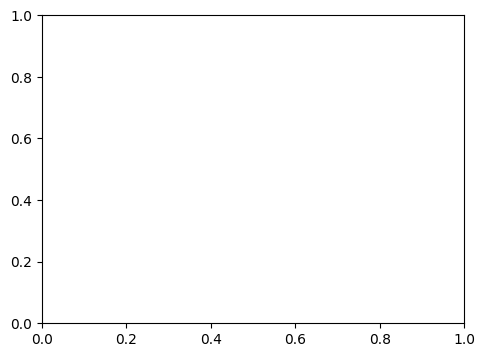

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


9 How can you use gradient clipping in Keras to control the gradient size and prevent exploding gradients!

In [18]:
from tensorflow.keras.optimizers import Adam

# Clip gradients by norm (e.g., max norm = 1.0)
optimizer = Adam(learning_rate=0.001, clipnorm=1.0)

# Or clip gradients by value (e.g., clip between -0.5 and 0.5)
# optimizer = Adam(learning_rate=0.001, clipvalue=0.5)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


10 How can you create a custom loss function in Keras!

In [19]:
import tensorflow.keras.backend as K

def custom_loss(y_true, y_pred):
    # Example: Mean squared error with a penalty term
    mse = K.mean(K.square(y_true - y_pred))
    penalty = 0.1 * K.sum(K.abs(y_pred))  # Just an example penalty
    return mse + penalty


In [20]:
model.compile(optimizer='adam', loss=custom_loss, metrics=['accuracy'])


In [21]:
def custom_loss(y_true, y_pred):
    return K.mean(K.square(y_true - y_pred)) + 0.01 * K.sum(K.square(y_pred))

In [22]:
import tensorflow as tf

@tf.function
def custom_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

 11 How can you visualize the structure of a neural network model in Keras?

In [23]:
from tensorflow.keras.utils import plot_model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, input_shape=(100,), activation='relu'),
    Dense(10, activation='softmax')
])

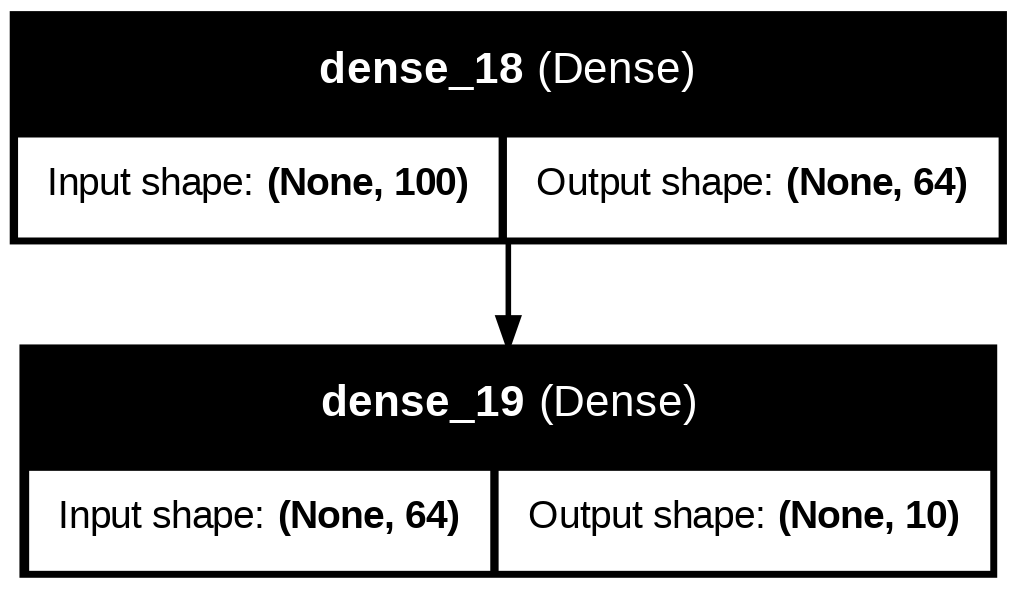

In [25]:
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)